170498071/170498071 [==============================] - 2s 0us/step
Epoch 1/50
1563/1563 [==============================] - 25s 7ms/step - loss: 1.8395 - accuracy: 0.3027
Epoch 2/50
1563/1563 [==============================] - 12s 8ms/step - loss: 1.4815 - accuracy: 0.4591
Epoch 3/50
1563/1563 [==============================] - 10s 6ms/step - loss: 1.3456 - accuracy: 0.5178
Epoch 4/50
1563/1563 [==============================] - 10s 6ms/step - loss: 1.2537 - accuracy: 0.5530
Epoch 5/50
1563/1563 [==============================] - 9s 6ms/step - loss: 1.1911 - accuracy: 0.5805
Epoch 6/50
1563/1563 [==============================] - 10s 6ms/step - loss: 1.1430 - accuracy: 0.5983
Epoch 7/50
1563/1563 [==============================] - 10s 6ms/step - loss: 1.1077 - accuracy: 0.6112
Epoch 8/50
1563/1563 [==============================] - 10s 6ms/step - loss: 1.0787 - accuracy: 0.6222
Epoch 9/50
1563/1563 [==============================] - 11s 7ms/step - loss: 1.0581 - accuracy: 0.6303
Epoch 1

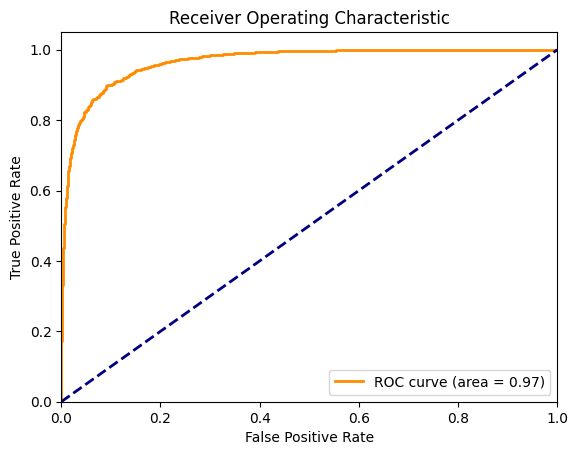

In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, cohen_kappa_score, roc_curve, auc
import matplotlib.pyplot as plt

# Load CIFAR-10 dataset
(X_train, y_train), (X_test, y_test) = keras.datasets.cifar10.load_data()

# Preprocess the data
X_train, X_test = X_train / 255.0, X_test / 255.0  # Normalize pixel values

# Define the CNN model
model = keras.Sequential([
    # Convolutional Layer 1
    layers.Conv2D(32, (5, 5), activation='relu', input_shape=(32, 32, 3)),

    # Convolutional Layer 2
    layers.Conv2D(64, (5, 5), activation='relu'),

    # Max Pooling Layer
    layers.MaxPooling2D((2, 2)),

    # Dropout Layer
    layers.Dropout(0.25),

    # Convolutional Layer 3
    layers.Conv2D(64, (3, 3), activation='relu'),

    # Convolutional Layer 4
    layers.Conv2D(64, (3, 3), activation='relu'),

    # Max Pooling Layer
    layers.MaxPooling2D((2, 2)),

    # Dropout Layer
    layers.Dropout(0.25),

    # Convolutional Layer 5
    layers.Conv2D(64, (3, 3), activation='relu'),

    # Max Pooling Layer
    layers.MaxPooling2D((2, 2)),

    # Dropout Layer
    layers.Dropout(0.25),

    # Flatten Layer
    layers.Flatten(),

    # Fully Connected (Dense) Layer
    layers.Dense(512, activation='relu'),

    # Dropout Layer
    layers.Dropout(0.5),

    # Output Layer (Dense Layer with Softmax Activation)
    layers.Dense(10, activation='softmax')
])
#])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=50, batch_size=32)

# Make predictions
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

# Compute the metrics
accuracy = accuracy_score(y_test, y_pred_classes)
confusion = confusion_matrix(y_test, y_pred_classes)
precision = precision_score(y_test, y_pred_classes, average='weighted')
recall = recall_score(y_test, y_pred_classes, average='weighted')
f1 = f1_score(y_test, y_pred_classes, average='weighted')
kappa = cohen_kappa_score(y_test, y_pred_classes)

# Compute ROC curve and AUC for one class (e.g., class 0)
fpr, tpr, _ = roc_curve(y_test == 0, y_pred[:, 0])
roc_auc = auc(fpr, tpr)

# Print the metrics
print(f"Accuracy: {accuracy}")
print(f"Confusion Matrix:\n{confusion}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")
print(f"Kappa: {kappa}")
print(f"AUC/ROC for class 0: {roc_auc}")

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()
